# Análise e Limpeza dos dados relacionados a quantidade de óbitos ocorridos no SUS 

## Importações dos pacotes

In [1]:
import pandas as pd
from functions_datasus import limpa_dados, plot_grafico_linha 

## Dados

In [2]:
dados = pd.read_csv("C:/Users/pedro/Documents/projeto_modulo_1_bootcamp2_alura/dados_brutos/A090752189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",", engine="python")

fonte : http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def

Os dados foram coletados do datasus e dizem respeito do número de internações processadas a partir de Janeiro de 2008 por mês e por Unidade Federativa, a fim de causar falsas impressões e ter certeza que os dados são reais e estão atualizados, os dados antes de janeiro de 2008(quando foram processados) serão removidos,o mês de janeiro de 2008 será removido também pois pode haver algum número equivocado. 

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
dados

,Unidade da Federação,1998/Ago,1998/Set,1999/Set,1999/Out,2000/Jan,2001/Dez,2002/Out,2004/Jul,2005/Nov,2007/Jan,2007/Fev,2007/Mar,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,7,26,27,67,65,103,96,92,106,80,71,77,87,79,89,123,97,138,126,122,99,102,117,139,125,121,106,121,125,172,158,182,180,192,191,195,184,187,186,169,149,184,218,190,180,199,195,167,169,179,154,213,231,205,205,213,193,176,197,200,200,191,195,238,196,259,255,205,186,226,230,222,201,232,231,262,214,242,269,278,285,259,241,232,252,261,248,239,223,264,256,268,272,263,271,274,281,270,269,281,265,311,334,341,302,310,309,282,320,271,261,276,288,363,323,301,297,313,287,284,288,238,256,334,272,299,310,283,265,291,315,245,276,316,297,303,251,281,350,319,268,305,266,269,257,255,257,313,258,274,278,377,444,386,423,335,283,326,402,420,275,270,37058
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,14,34,64,107,115,110,103,103,96,92,38,72,88,77,116,109,66,99,83,86,69,84,78,96,91,103,77,94,93,121,103,106,135,122,126,124,125,95,115,138,134,129,125,133,123,123,129,118,124,116,128,120,94,142,106,105,108,127,106,105,117,116,91,133,104,121,118,93,103,101,92,98,88,76,63,72,79,121,114,124,104,82,115,96,126,143,100,111,98,111,146,127,134,117,136,100,129,121,122,122,128,128,132,132,118,115,132,122,121,103,117,111,137,117,115,126,117,127,118,111,121,100,116,132,97,118,125,126,155,155,152,135,136,93,107,126,120,118,139,133,122,118,143,126,143,140,142,144,156,126,157,190,205,200,150,131,122,147,172,134,121,66,18615
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,35,105,214,260,306,272,295,304,286,245,233,205,236,204,196,216,246,271,278,277,325,287,280,276,280,220,229,239,227,280,312,271,272,279,275,279,271,303,345,316,326,335,344,288,325,325,335,309,348,326,266,283,207,421,363,396,309,354,341,292,312,349,260,359,348,367,296,299,294,227,261,280,311,263,293,264,215,272,324,234,245,264,244,287,269,302,254,332,270,363,368,407,362,356,346,384,360,378,398,439,395,515,402,462,427,426,447,386,370,360,411,471,443,458,441,442,476,462,478,440,473,399,440,452,401,473,522,546,512,499,502,478,560,464,474,506,538,597,495,477,507,527,570,538,544,519,529,604,534,606,1525,1335,750,720,684,693,691,759,999,2456,825,329,64963
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,6,14,27,18,28,27,26,35,40,39,41,35,33,44,38,35,26,52,51,42,42,58,64,59,57,45,56,52,67,50,58,58,70,62,68,86,65,53,66,52,65,64,46,59,64,66,56,67,54,49,42,60,45,56,68,60,62,49,69,50,50,41,57,48,55,57,54,61,55,61,53,39,53,52,45,44,45,57,62,70,60,54,65,54,74,67,61,58

In [4]:
dados.mean()

2007/Out        99.222222
2007/Nov       239.259259
2007/Dez       643.703704
2008/Jan      1165.148148
2008/Fev      1005.777778
2008/Mar      1083.370370
2008/Abr      1088.444444
2008/Mai      1168.740741
2008/Jun      1161.962963
2008/Jul      1217.518519
2008/Ago      1136.407407
2008/Set      1125.925926
2008/Out      1150.777778
2008/Nov      1048.666667
2008/Dez      1089.222222
2009/Jan      1140.481481
2009/Fev      1023.888889
2009/Mar      1170.296296
2009/Abr      1162.296296
2009/Mai      1208.111111
2009/Jun      1271.851852
2009/Jul      1333.481481
2009/Ago      1283.703704
2009/Set      1200.777778
2009/Out      1212.814815
2009/Nov      1147.259259
2009/Dez      1176.777778
2010/Jan      1255.888889
2010/Fev      1173.851852
2010/Mar      1265.925926
2010/Abr      1216.962963
2010/Mai      1274.629630
2010/Jun      1305.740741
2010/Jul      1314.555556
2010/Ago      1362.962963
2010/Set      1285.666667
2010/Out      1283.518519
2010/Nov      1228.777778
2010/Dez    

In [5]:
help(limpa_dados)

Help on function limpa_dados in module functions_datasus:

limpa_dados(dados)
    Função que recebe um conjunto de dados do datasus e faz diversas manipulações:
        
        renomeia a coluna Unidade da Federação para UF para simplificar
        cria uma coluna para cada região
        elimina os números antes do nome dos estados
        define o estado e região como index
        elimina a coluna total
        tranforma as colunas relacionadas a data para o tipo date do python
        restringe a data entre fevereiro de 2008 e agosto de 2020



In [6]:
dados = limpa_dados(dados)
dados

,,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,2010-10-01,2010-11-01,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01,2012-01-01,2012-02-01,2012-03-01,2012-04-01,2012-05-01,2012-06-01,2012-07-01,2012-08-01,2012-09-01,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,2013-11-01,2013-12-01,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01
UF,regiao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,Norte,65,103,96,92,106,80,71,77,87,79,89,123,97,138,126,122,99,102,117,139,125,121,106,121,125,172,158,182,180,192,191,195,184,187,186,169,149,184,218,190,180,199,195,167,169,179,154,213,231,205,205,213,193,176,197,200,200,191,195,238,196,259,255,205,186,226,230,222,201,232,231,262,214,242,269,278,285,259,241,232,252,261,248,239,223,264,256,268,272,263,271,274,281,270,269,281,265,311,334,341,302,310,309,282,320,271,261,276,288,363,323,301,297,313,287,284,288,238,256,334,272,299,310,283,265,291,315,245,276,316,297,303,251,281,350,319,268,305,266,269,257,255,257,313,258,274,278,377,444,386,423,335
Acre,Norte,115,110,103,103,96,92,38,72,88,77,116,109,66,99,83,86,69,84,78,96,91,103,77,94,93,121,103,106,135,122,126,124,125,95,115,138,134,129,125,133,123,123,129,118,124,116,128,120,94,142,106,105,108,127,106,105,117,116,91,133,104,121,118,93,103,101,92,98,88,76,63,72,79,121,114,124,104,82,115,96,126,143,100,111,98,111,146,127,134,117,136,100,129,121,122,122,128,128,132,132,118,115,132,122,121,103,117,111,137,117,115,126,117,127,118,111,121,100,116,132,97,118,125,126,155,155,152,135,136,93,107,126,120,118,139,133,122,118,143,126,143,140,142,144,156,126,157,190,205,200,150,131
Amazonas,Norte,306,272,295,304,286,245,233,205,236,204,196,216,246,271,278,277,325,287,280,276,280,220,229,239,227,280,312,271,272,279,275,279,271,303,345,316,326,335,344,288,325,325,335,309,348,326,266,283,207,421,363,396,309,354,341,292,312,349,260,359,348,367,296,299,294,227,261,280,311,263,293,264,215,272,324,234,245,264,244,287,269,302,254,332,270,363,368,407,362,356,346,384,360,378,398,439,395,515,402,462,427,426,447,386,370,360,411,471,443,458,441,442,476,462,478,440,473,399,440,452,401,473,522,546,512,499,502,478,560,464,474,506,538,597,495,477,507,527,570,538,544,519,529,604,534,606,1525,1335,750,720,684,693
Roraima,Norte,18,28,27,26,35,40,39,41,35,33,44,38,35,26,52,51,42,42,58,64,59,57,45,56,52,67,50,58,58,70,62,68,86,65,53,66,52,65,64,46,59,64,66,56,67,54,49,42,60,45,56,68,60,62,49,69,50,50,41,57,48,55,57,54,61,55,61,53,39,53,52,45,44,45,57,62,70,60,54,65,54,74,67,61,58,61,76,69,84,56,62,64,60,57,65,67,82,69,69,81,94,100,83,82,71,78,81,90,71,

In [9]:
help(plot_grafico_linha)

Help on function plot_grafico_linha in module functions_datasus:

plot_grafico_linha(dados, title='', ylabel='', xlabel='Ano/Mês', formatter=None)
    Função que recebe o dataframe e plota um gráfico de linha de cada Unidade Federativa com o eixo x com a data e eixo y os valores numéricos



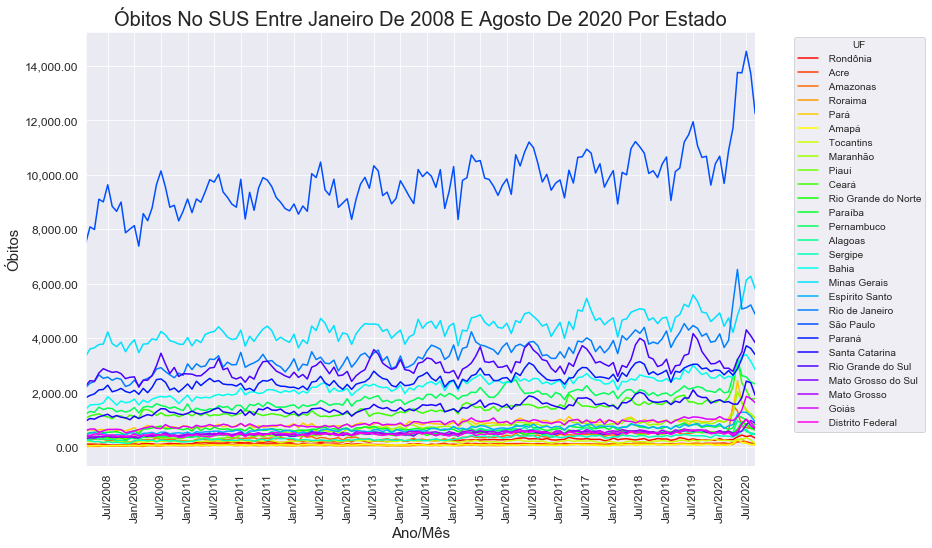

In [7]:
plot_grafico_linha(dados.reset_index(level=1, drop=True), 'Óbitos No SUS Entre Janeiro De 2008 E Agosto De 2020 Por Estado', 'Óbitos')

In [8]:
#Salvando os dados limpos no diretório
dados.to_csv("C:/Users/pedro/Documents/projeto_modulo_1_bootcamp2_alura/dados_limpos/obitos.csv")